# Exploratory Data Analysis

In this notebook I'll conduct an exploration of the "Maven Fuzzy Factory" dataset, which simulates sales for a fictitious e-commerce site selling stuffed animals. The work to be done includes profiling, cleaning, and visualizing the data.

TO_DO:
Feature engineering of `orders.created_at`: `day_of_the_month` + 10-day rule (1-10, 11-20, 21-end) for Beginning, Middle, End; `day_of_week` + `day_of_week_name` + whether it is weekend or weekday, plus `hour_of_day` with extra Office Hours or not

## About the source

The [original dataset](https://mavenanalytics.io/data-playground/toy-store-e-commerce-database) was created by Maven Analytics who supplies it for free under a Public Domain license. I do not claim to own or have any rights over the dataset.

## Relevant business questions to answer

Some relevant e-commerce metrics that'll be studied in this project are:
* Most popular product
* Least popular product
* Conversion rate
* Average order value

Additional questions can be formulated after skimming over the data.

## Importing required libraries

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils.notebook_aux as aux

## Reading the data dictionary

The dataset comes with a data dictionary detailing the relationships between the different tables.

In [117]:
data_dict = pd.read_csv('../data/raw/maven_fuzzy_factory_data_dictionary.csv')
data_dict.info()
data_dict.head()

<class 'pandas.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Table        36 non-null     str  
 1   Field        36 non-null     str  
 2   Description  36 non-null     str  
dtypes: str(3)
memory usage: 996.0 bytes


,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...


Seems like the data dictionary loaded correctly. How many tables does the dictionary describe?

In [118]:
count = 0
for table in list(data_dict['Table'].unique()):
    print('\''+table+'\'')
    count += 1
print(f'tables described: {count}')

'orders'
'order_items'
'order_item_refunds'
'products'
'website_sessions'
'website_pageviews'
tables described: 6


The data dictionary packaged with the database seems to cover all (6) available files, let's explore them one by one.

What are the characteristics of the `orders` table?

In [119]:
descriptions = {}
descriptions['orders'] = data_dict[data_dict['Table'] == 'orders']
descriptions['orders']

,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...
5,orders,items_purchased,Number of items in the order
6,orders,price_usd,Total price for the items in the order
7,orders,cogs_usd,Cost of goods sold for the items in the order


What are the characteristics of the `order_items` table?

In [120]:
descriptions['order_items'] = data_dict[data_dict['Table'] == 'order_items']
descriptions['order_items']

,Table,Field,Description
8,order_items,order_item_id,Unique identifier for each order item (PK)
9,order_items,created_at,Timestamp when the order was placed
10,order_items,order_id,Unique identifier for the order the item belon...
11,order_items,product_id,Unique identifier for the product (FK)
12,order_items,is_primary_item,Binary flag with a value of 1 if it's the prim...
13,order_items,price_usd,Price of the product
14,order_items,cogs_usd,Cost of goods sold of the product


What are the characteristics of the `order_item_refunds` table?

In [121]:
descriptions['order_item_refunds'] = data_dict[data_dict['Table'] == 'order_item_refunds']
descriptions['order_item_refunds']

,Table,Field,Description
15,order_item_refunds,order_item_refund_id,Unique identifier for each refund (PK)
16,order_item_refunds,created_at,Timestamp when the refund was issued
17,order_item_refunds,order_item_id,Unique identifier for the order item that was ...
18,order_item_refunds,order_id,Unique identifier for the order the refunded i...
19,order_item_refunds,refund_amount_usd,Refund amount


What are the characteristic of the `products` table?

In [122]:
descriptions['products'] = data_dict[data_dict['Table'] == 'products']
descriptions['products'] 

,Table,Field,Description
20,products,product_id,Unique identifier for the product (PK)
21,products,created_at,Timestamp for when the product was launched
22,products,product_name,Name of the product


What are the characteristics of the `website_sessions` table?

In [123]:
descriptions['website_sessions'] = data_dict[data_dict['Table'] == 'website_sessions']
descriptions['website_sessions']

,Table,Field,Description
23,website_sessions,website_session_id,Unique identifier for the website session (PK)
24,website_sessions,created_at,Timestamp when the session started
25,website_sessions,user_id,Unique identifier for the user (FK)
26,website_sessions,is_repeat_session,Binary flag with a value of 1 if the user has ...
27,website_sessions,utm_source,UTM source parameter (traffic origin)
28,website_sessions,utm_campaign,UTM campaign parameter (marketing campaign name)
29,website_sessions,utm_content,UTM content parameter (ad/content variant)
30,website_sessions,device_type,Device category (mobile or desktop)
31,website_sessions,http_referer,URL for the UTM source


What are the characteristics of the `website_pageviews` table?

In [124]:
descriptions['website_pageviews'] = data_dict[data_dict['Table'] == 'website_pageviews']
descriptions['website_pageviews']

,Table,Field,Description
32,website_pageviews,website_pageview_id,Unique identifier for each website pageview (PK)
33,website_pageviews,created_at,Timestamp for the pageview
34,website_pageviews,website_session_id,Unique identifier for the website session the ...
35,website_pageviews,pageview_url,URL path for the pageview


## Data Context

* The `csv` data dictionary provided by the authors loaded correctly and contains context for the data.
* I've loaded table descriptions for the entire dataset into a dictionary object to work with.
* I've found information in the data dictionary to guide data type assignation.
* The presence of `user_id` in several tables indicates I only have a part of the database. In any case, `user_id` can be assumed to be the unique identifier for this store's customers and can be used to count them without accessing more information about them.
* I now understand the relationship between the tables and can create an ERD (entity relationship diagram) to serve as reference for the rest of my work.

![ERD](img/maven_fuzzy_factory_erd.png)

Diagram created with [SmartDraw](https://www.smartdraw.com)

## Extracting the rest of the tables

In [125]:
orders = pd.read_csv('../data/raw/orders.csv')
order_items = pd.read_csv('../data/raw/order_items.csv')
order_item_refunds = pd.read_csv('../data/raw/order_item_refunds.csv')
products = pd.read_csv('../data/raw/products.csv')
website_pageviews = pd.read_csv('../data/raw/website_pageviews.csv')
website_sessions = pd.read_csv('../data/raw/website_sessions.csv')

## Data profiling

In this section I'll proceed to check the data for specific errors, flaws, and/or possible contradictions. Correct datatypes will be asigned to all columns according to the context in the data dictionary. 

### Table: `orders`

#### Structure: `orders`

In [126]:
descriptions['orders']

,Table,Field,Description
0,orders,order_id,Unique identifier for each order (PK)
1,orders,created_at,Timestamp when the order was placed
2,orders,website_session_id,Unique identifier for the website session (FK)
3,orders,user_id,Unique identifier for the user (FK)
4,orders,primary_product_id,Unique identifier for the primary product in t...
5,orders,items_purchased,Number of items in the order
6,orders,price_usd,Total price for the items in the order
7,orders,cogs_usd,Cost of goods sold for the items in the order


In [127]:
orders.info()
orders.head()

<class 'pandas.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            32313 non-null  int64  
 1   created_at          32313 non-null  str    
 2   website_session_id  32313 non-null  int64  
 3   user_id             32313 non-null  int64  
 4   primary_product_id  32313 non-null  int64  
 5   items_purchased     32313 non-null  int64  
 6   price_usd           32313 non-null  float64
 7   cogs_usd            32313 non-null  float64
dtypes: float64(2), int64(5), str(1)
memory usage: 2.0 MB


,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49


* Data loaded correctly.

#### Missing values: `orders`

In [128]:
orders.isna().sum()

order_id              0
created_at            0
website_session_id    0
user_id               0
primary_product_id    0
items_purchased       0
price_usd             0
cogs_usd              0
dtype: int64

* No missing values found.

#### Duplicates: `orders`

In [129]:
orders.duplicated().sum()

np.int64(0)

* No whole-row duplicates were found.

In [130]:
orders['order_id'].duplicated().sum()

np.int64(0)

* No unique identifier duplicates where found.

#### Numeric value range: `orders`

In [131]:
orders.drop('created_at', axis=1).describe()

,order_id,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
count,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000,32313.000000
mean,16157.000000,258292.288707,215691.622629,1.392474,1.238666,59.991636,22.355406
std,9328.103961,132427.649842,108402.203189,0.732277,0.426274,17.808771,6.238621
min,1.000000,20.000000,13.000000,1.000000,1.000000,29.990000,9.490000
25%,8079.000000,144828.000000,124135.000000,1.000000,1.000000,49.990000,19.490000
50%,16157.000000,263554.000000,221461.000000,1.000000,1.000000,49.990000,19.490000
75%,24235.000000,374799.000000,310542.000000,2.000000,1.000000,59.990000,22.490000
max,32313.000000,472818.000000,394273.000000,4.000000,2.000000,109.980000,41.980000


* Numeric columns show values within expected ranges.

#### Correct data types: `orders`

In [132]:
# set the created_at timestamp to datetime type
orders['created_at'] = pd.to_datetime(orders['created_at'], format='%Y-%m-%d %H:%M:%S')
# set ids to uint32, enough to cover the range of values
orders['order_id'] = orders['order_id'].astype('uint32')
orders['website_session_id'] = orders['website_session_id'].astype('uint32')
orders['user_id'] = orders['user_id'].astype('uint32')
orders['primary_product_id'] = orders['primary_product_id'].astype('uint32')
# set items purchased to uint16, more than enough to cover the range of values
orders['items_purchased'] = orders['items_purchased'].astype('uint16')

#### Check timestamp range: `orders`

In [133]:
# check date range
print(orders['created_at'].min(), orders['created_at'].max())

2012-03-19 10:42:46 2015-03-19 05:38:31


* We have 3 years of sales data.

#### Profiling results: `orders`

In [134]:
orders.info()
orders.head()

<class 'pandas.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            32313 non-null  uint32        
 1   created_at          32313 non-null  datetime64[us]
 2   website_session_id  32313 non-null  uint32        
 3   user_id             32313 non-null  uint32        
 4   primary_product_id  32313 non-null  uint32        
 5   items_purchased     32313 non-null  uint16        
 6   price_usd           32313 non-null  float64       
 7   cogs_usd            32313 non-null  float64       
dtypes: datetime64[us](1), float64(2), uint16(1), uint32(4)
memory usage: 1.3 MB


,order_id,created_at,website_session_id,user_id,primary_product_id,items_purchased,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,20,20,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,104,104,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,147,147,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,160,160,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,177,177,1,1,49.99,19.49


* The data loaded correctly and conforms to the structure mentioned in the data dictionary.
* Data was clean from the beginning, no missing values, no harmful duplicates, no typos.
* Timestamp variable, `created_at`, assigned correct type.
* Confirmed the dataset contains 3 years of sales data.
* Other columns had their type adjusted to optimize memory.

### Table: `order_items`

#### Structure: `order_items`

In [135]:
descriptions['order_items']

,Table,Field,Description
8,order_items,order_item_id,Unique identifier for each order item (PK)
9,order_items,created_at,Timestamp when the order was placed
10,order_items,order_id,Unique identifier for the order the item belon...
11,order_items,product_id,Unique identifier for the product (FK)
12,order_items,is_primary_item,Binary flag with a value of 1 if it's the prim...
13,order_items,price_usd,Price of the product
14,order_items,cogs_usd,Cost of goods sold of the product


In [136]:
order_items.info()
order_items.head()

<class 'pandas.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_item_id    40025 non-null  int64  
 1   created_at       40025 non-null  str    
 2   order_id         40025 non-null  int64  
 3   product_id       40025 non-null  int64  
 4   is_primary_item  40025 non-null  int64  
 5   price_usd        40025 non-null  float64
 6   cogs_usd         40025 non-null  float64
dtypes: float64(2), int64(4), str(1)
memory usage: 2.1 MB


,order_item_id,created_at,order_id,product_id,is_primary_item,price_usd,cogs_usd
0,1,2012-03-19 10:42:46,1,1,1,49.99,19.49
1,2,2012-03-19 19:27:37,2,1,1,49.99,19.49
2,3,2012-03-20 06:44:45,3,1,1,49.99,19.49
3,4,2012-03-20 09:41:45,4,1,1,49.99,19.49
4,5,2012-03-20 11:28:15,5,1,1,49.99,19.49


* Data loaded correctly.

#### Missing values: `order_items`

In [137]:
order_items.isna().sum()

order_item_id      0
created_at         0
order_id           0
product_id         0
is_primary_item    0
price_usd          0
cogs_usd           0
dtype: int64

* Data contains no missing values.

#### Duplicates: `order_items`

In [138]:
order_items.duplicated().sum()

np.int64(0)

* No whole-row duplicates found.

In [139]:
order_items['order_item_id'].duplicated().sum()

np.int64(0)

* No unique identifier duplicates found.

In [140]:
order_items[['order_id', 'product_id', 'is_primary_item']].duplicated().sum()

np.int64(0)

* No order has multiple primary items.

#### Correct data types: `order_items`

In [141]:
# set the created_at timestamp to datetime type
order_items['created_at'] = pd.to_datetime(order_items['created_at'], format='%Y-%m-%d %H:%M:%S')
# set ids to uint32, enough to cover the range of values
order_items['order_item_id'] = order_items['order_item_id'].astype('uint32')
order_items['order_id'] = order_items['order_id'].astype('uint32')
# product_id has an even smaller range of values
order_items['product_id'] = order_items['product_id'].astype('uint16')
# is_primary_item is a boolean
order_items['is_primary_item'] = order_items['is_primary_item'].astype('boolean')

#### Check timestamp range: `order_items`

In [142]:
# check date range
print(orders['created_at'].min(), orders['created_at'].max())

2012-03-19 10:42:46 2015-03-19 05:38:31


* 3 years of sales data.

#### Profiling results: `order_items`

In [143]:
order_items.info()

<class 'pandas.DataFrame'>
RangeIndex: 40025 entries, 0 to 40024
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_item_id    40025 non-null  uint32        
 1   created_at       40025 non-null  datetime64[us]
 2   order_id         40025 non-null  uint32        
 3   product_id       40025 non-null  uint16        
 4   is_primary_item  40025 non-null  boolean       
 5   price_usd        40025 non-null  float64       
 6   cogs_usd         40025 non-null  float64       
dtypes: boolean(1), datetime64[us](1), float64(2), uint16(1), uint32(2)
memory usage: 1.4 MB


* The data loaded correctly and conforms to the structure mentioned in the data dictionary.
* Data was clean from the beginning, no missing values, no harmful duplicates, no typos.
* Timestamp variable, `created_at`, assigned correct type.
* Confirmed the dataset contains 3 years of sales data.
* Other columns had their type adjusted to optimize memory.

### Table: `order_item_refunds`

#### Structure: `order_item_refunds`

In [144]:
descriptions['order_item_refunds']

,Table,Field,Description
15,order_item_refunds,order_item_refund_id,Unique identifier for each refund (PK)
16,order_item_refunds,created_at,Timestamp when the refund was issued
17,order_item_refunds,order_item_id,Unique identifier for the order item that was ...
18,order_item_refunds,order_id,Unique identifier for the order the refunded i...
19,order_item_refunds,refund_amount_usd,Refund amount


In [145]:
order_item_refunds.info()
order_item_refunds.head()

<class 'pandas.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_item_refund_id  1731 non-null   int64  
 1   created_at            1731 non-null   str    
 2   order_item_id         1731 non-null   int64  
 3   order_id              1731 non-null   int64  
 4   refund_amount_usd     1731 non-null   float64
dtypes: float64(1), int64(3), str(1)
memory usage: 67.7 KB


,order_item_refund_id,created_at,order_item_id,order_id,refund_amount_usd
0,1,2012-04-06 11:32:43,57,57,49.99
1,2,2012-04-13 01:09:43,74,74,49.99
2,3,2012-04-15 07:03:48,71,71,49.99
3,4,2012-04-17 20:00:37,118,118,49.99
4,5,2012-04-22 20:53:49,116,116,49.99


* Data loaded correctly.

#### Missing values: `order_item_refunds`

In [146]:
order_item_refunds.isna().sum()

order_item_refund_id    0
created_at              0
order_item_id           0
order_id                0
refund_amount_usd       0
dtype: int64

* Data contains no missing values.

#### Duplicates: `order_item_refunds`

In [147]:
order_item_refunds.duplicated().sum()

np.int64(0)

* No whole-row duplicates found.

In [148]:
order_item_refunds['order_item_refund_id'].duplicated().sum()

np.int64(0)

* No duplicated unique identifiers were found.

In [149]:
order_item_refunds[['order_item_id', 'order_id']].duplicated().sum()

np.int64(0)

* The same item was not refunded for the same order more than once.

#### Correct data types: `order_item_refunds`

In [150]:
# set the created_at timestamp to datetime type
order_item_refunds['created_at'] = pd.to_datetime(order_item_refunds['created_at'], format='%Y-%m-%d %H:%M:%S')
# set ids to uint32, enough to cover the range of values
order_item_refunds['order_item_refund_id'] = order_item_refunds['order_item_refund_id'].astype('uint32')
order_item_refunds['order_item_id'] = order_item_refunds['order_item_id'].astype('uint32')
order_item_refunds['order_id'] = order_item_refunds['order_id'].astype('uint32')

#### Check timestamp range: `order_item_refunds`

In [151]:
# check date range
print(orders['created_at'].min(), orders['created_at'].max())

2012-03-19 10:42:46 2015-03-19 05:38:31


* 3 years of data.

#### Profiling results: `order_item_refunds`

In [152]:
order_item_refunds.info()

<class 'pandas.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_item_refund_id  1731 non-null   uint32        
 1   created_at            1731 non-null   datetime64[us]
 2   order_item_id         1731 non-null   uint32        
 3   order_id              1731 non-null   uint32        
 4   refund_amount_usd     1731 non-null   float64       
dtypes: datetime64[us](1), float64(1), uint32(3)
memory usage: 47.5 KB


* The data loaded correctly and conforms to the structure mentioned in the data dictionary.
* Data was clean from the beginning, no missing values, no harmful duplicates, no typos.
* Timestamp variable, `created_at`, assigned correct type.
* Confirmed the dataset contains 3 years of sales data.
* Other columns had their type adjusted to optimize memory.

### Table: `products`

#### Structure: `products`

In [176]:
descriptions['products']

,Table,Field,Description
20,products,product_id,Unique identifier for the product (PK)
21,products,created_at,Timestamp for when the product was launched
22,products,product_name,Name of the product


In [177]:
products.info()
products.head()

<class 'pandas.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   product_id    4 non-null      int64
 1   created_at    4 non-null      str  
 2   product_name  4 non-null      str  
dtypes: int64(1), str(2)
memory usage: 228.0 bytes


,product_id,created_at,product_name
0,1,2012-03-19 08:00:00,The Original Mr. Fuzzy
1,2,2013-01-06 13:00:00,The Forever Love Bear
2,3,2013-12-12 09:00:00,The Birthday Sugar Panda
3,4,2014-02-05 10:00:00,The Hudson River Mini bear


* Data loaded correctly.
* There is no need to check for missing values or duplicated values, the data is four rows and it's clear it has neither of those errors.

#### Correct data types: `products`

In [181]:
# set the created_at timestamp to datetime type
products['created_at'] = pd.to_datetime(products['created_at'], format='%Y-%m-%d %H:%M:%S')
# set id to uint32, enough to cover the range of values
products['product_id'] = order_item_refunds['order_item_refund_id'].astype('uint32')
# the product name could be a category, but there is no benefit doing so

#### Check timestamp range: `products`

In [182]:
# check date range
print(products['created_at'].min(), products['created_at'].max())

2012-03-19 08:00:00 2014-02-05 10:00:00


* 3 years of data.

#### Profiling results: `products`

In [183]:
products.info()

<class 'pandas.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_id    4 non-null      uint32        
 1   created_at    4 non-null      datetime64[us]
 2   product_name  4 non-null      str           
dtypes: datetime64[us](1), str(1), uint32(1)
memory usage: 212.0 bytes


* This table is fairly simple and short.
* Like the previous one, it's clean and error free.
* Aside from adjusting the data types nothing else was done to it.

### Table: `website_sessions`

#### Structure: `website_sessions`

#### Missing values: `website_sessions`

#### Duplicates: `website_sessions`

#### Correct data types: `website_sessions`

#### Check timestamp range: `website_sessions`

#### Profiling results: `website_sessions`

### Table: `website_pageviews`

#### Structure: `website_pageviews`

#### Missing values: `website_pageviews`

#### Duplicates: `website_pageviews`

#### Correct data types: `website_pageviews`

#### Check timestamp range: `website_pageviews`

#### Profiling results: `website_pageviews`

## Univariate Analysis

### Table: `orders`

* Keys, primary or foreign, don't need to be analyzed.
* Focus on `created_at`, `items_purchased`, `price_usd`, `cogs_usd`

#### Column: `orders['created_at']`

In [153]:
# copy main df for testing
test = orders[['order_id', 'created_at']].copy()
# year 2012 2013 2014 2015
# month 1 to 12
test['year'] = aux.make_year_ordinal_column(test, 'created_at')
# month as number, 1 to 12
test['month'] = aux.make_month_ordinal_column(test, 'created_at')
# day of the month as number
test['day_of_the_month'] = test['created_at'].dt.day
# day of the week as number
test['day_of_the_week'] = test['created_at'].dt.day_of_week
# hours in 24 hour clock
test['hour'] = test['created_at'].dt.hour
# minute and second seems irrelevant at this stage of analysis
test.info()
test.head()

<class 'pandas.DataFrame'>
RangeIndex: 32313 entries, 0 to 32312
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          32313 non-null  uint32        
 1   created_at        32313 non-null  datetime64[us]
 2   year              32313 non-null  category      
 3   month             32313 non-null  category      
 4   day_of_the_month  32313 non-null  int32         
 5   day_of_the_week   32313 non-null  int32         
 6   hour              32313 non-null  int32         
dtypes: category(2), datetime64[us](1), int32(3), uint32(1)
memory usage: 821.2 KB


,order_id,created_at,year,month,day_of_the_month,day_of_the_week,hour
0,1,2012-03-19 10:42:46,2012,3,19,0,10
1,2,2012-03-19 19:27:37,2012,3,19,0,19
2,3,2012-03-20 06:44:45,2012,3,20,1,6
3,4,2012-03-20 09:41:45,2012,3,20,1,9
4,5,2012-03-20 11:28:15,2012,3,20,1,11


* Splitting the timestamp into it's components will allow me to examine seasonal trends.

##### Year

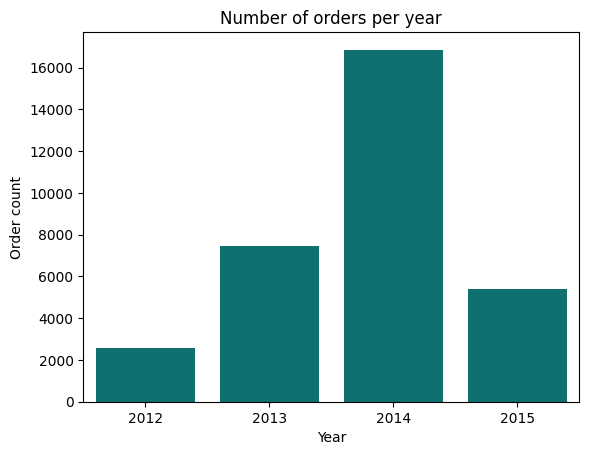

In [154]:
plot_df = test.groupby('year')['order_id'].count().reset_index()
sns.barplot(x=plot_df['year'],
            y=plot_df['order_id'],
            color='teal')
plt.xlabel('Year')
plt.ylabel('Order count')
plt.title('Number of orders per year')
plt.show()

* 2014 was the year with most orders.
* As of March, 2015 the number of orders is reaching 2013's total. Future predictive modeling should reflect a booming business, hopefully.
* Feature engineering should consider splitting the year off the timestamp.

##### Month

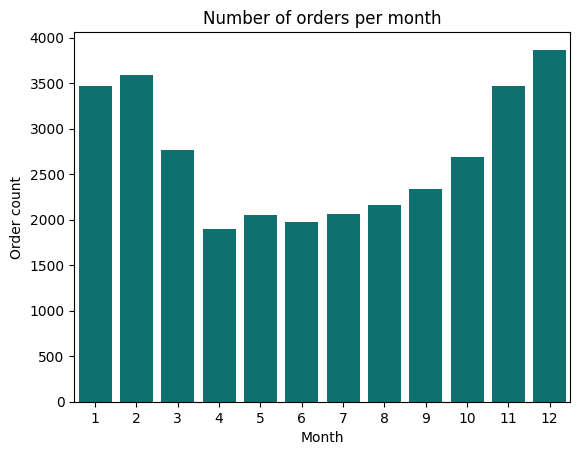

In [155]:
plot_df = test.groupby('month')['order_id'].count().reset_index()
sns.barplot(x=plot_df['month'],
            y=plot_df['order_id'],
            color='teal')
plt.xlabel('Month')
plt.ylabel('Order count')
plt.title('Number of orders per month')
plt.show()

* The seasonality looks as expected for stuffed animals with most sales during the end of the year holidays plus a peak around february.
* April, May, and June are out worst months.
* Splitting month off the timestamp should be considered during feature engineering.

##### Day of the month

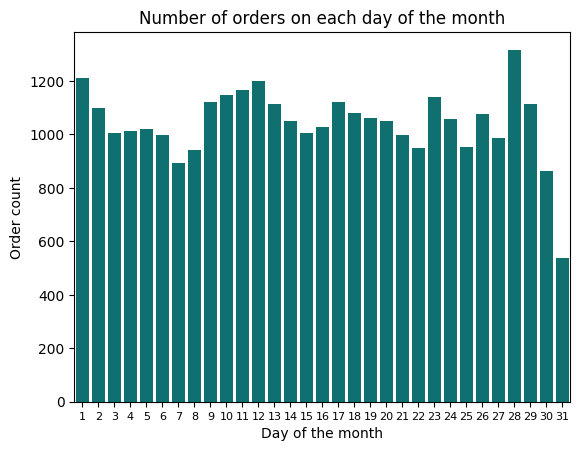

In [156]:
plot_df = test.groupby('day_of_the_month')['order_id'].count().reset_index()
ax = sns.barplot(x=plot_df['day_of_the_month'],
            y=plot_df['order_id'],
            color='teal')
ax.tick_params(axis='x', labelsize=8)
plt.xlabel('Day of the month')
plt.ylabel('Order count')
plt.title('Number of orders on each day of the month')
plt.show()

* By itself this does not reveal much, I recommend to apply the 10-day rule to divide the month into beginning, middle, and end. This would also solve `31` having such a low value, caused because many months don't have 31 days.

##### Day of the week

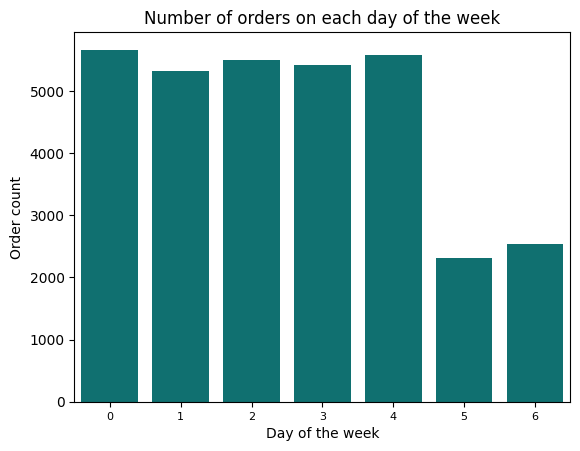

In [157]:
plot_df = test.groupby('day_of_the_week')['order_id'].count().reset_index()
ax = sns.barplot(x=plot_df['day_of_the_week'],
            y=plot_df['order_id'],
            color='teal')
ax.tick_params(axis='x', labelsize=8)
plt.xlabel('Day of the week')
plt.ylabel('Order count')
plt.title('Number of orders on each day of the week')
plt.show()

* Day of the week numbering in pandas starts at 0 with monday, all the way to sunday as 6.
* Orders are higher on weekdays than on weekends.
* This should be considered during feature engineering.

##### Hour

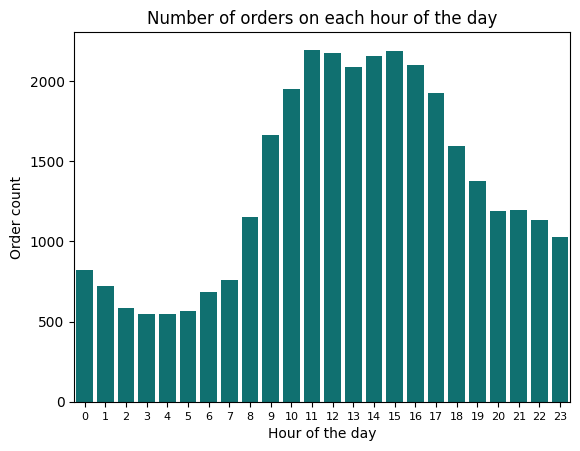

In [158]:
plot_df = test.groupby('hour')['order_id'].count().reset_index()
ax = sns.barplot(x=plot_df['hour'],
            y=plot_df['order_id'],
            color='teal')
ax.tick_params(axis='x', labelsize=8)
plt.xlabel('Hour of the day')
plt.ylabel('Order count')
plt.title('Number of orders on each hour of the day')
plt.show()

* Greatest number of orders happen during business hours.

#### Column: `orders['items_purchased']`

In [159]:
orders['items_purchased'].describe()

count    32313.000000
mean         1.238666
std          0.426274
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: items_purchased, dtype: float64

* Orders either contain one or two items. 
* Outlier detection is not required for this column.

Counting orders:
With 1 item, 24601 (76.13%)
With 2 items, 7712 (23.87%)


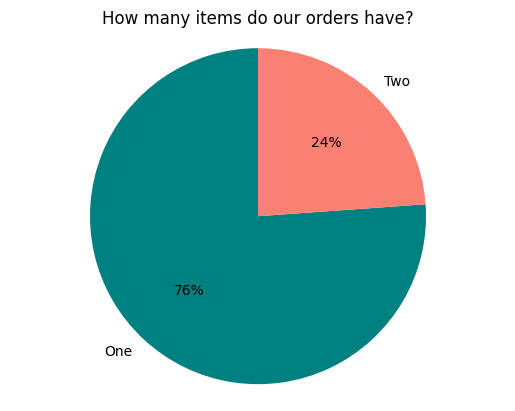

In [160]:
print('Counting orders:')
count_orders = orders.shape[0]
count_orders_with_one_item = orders[orders['items_purchased'] == 1]['items_purchased'].count()
percent_orders_with_one_item = round(count_orders_with_one_item / count_orders * 100, 2)
count_orders_with_two_items = orders[orders['items_purchased'] == 2]['items_purchased'].count()
percent_orders_with_two_items = round(count_orders_with_two_items / count_orders * 100, 2)
print(f'With 1 item, {count_orders_with_one_item} ({percent_orders_with_one_item}%)')
print(f'With 2 items, {count_orders_with_two_items} ({percent_orders_with_two_items}%)')
labels = ['One', 'Two']
data = [count_orders_with_one_item, count_orders_with_two_items]

# pie chart
plt.pie(data, 
        labels=labels,
        colors=['teal', 'salmon'], 
        autopct='%.0f%%',  
        startangle=90)
plt.title('How many items do our orders have?') # Add a title
plt.axis('equal') # Ensures the pie chart is drawn as a perfect circle
plt.show()

#### Column: `orders['price_usd']`

In [161]:
orders['price_usd'].describe()

count    32313.000000
mean        59.991636
std         17.808771
min         29.990000
25%         49.990000
50%         49.990000
75%         59.990000
max        109.980000
Name: price_usd, dtype: float64

* The mean is too close to Q3, outlier detection is advised.
* Q1 and Q2 (median) overlap.

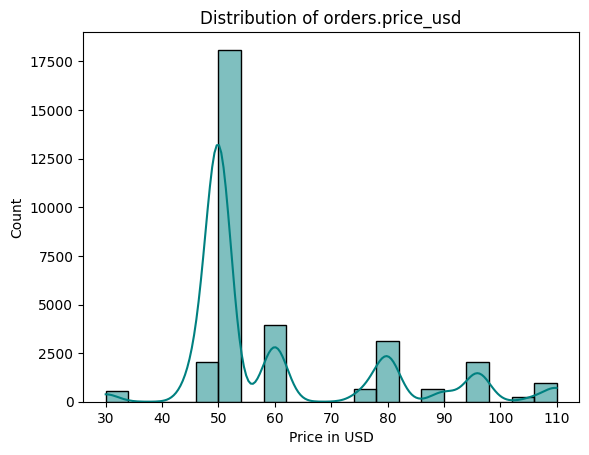

In [162]:
sns.histplot(x=orders['price_usd'],
             color='teal',
             kde=True,
             bins=20)
plt.xlabel('Price in USD')
plt.title('Distribution of orders.price_usd')
plt.show()

* Variable shows right-skewness.

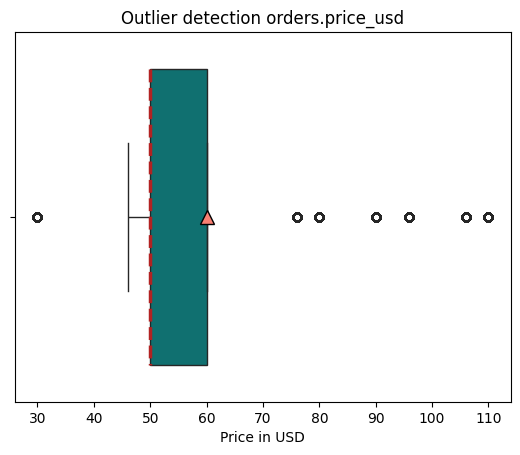

In [163]:
sns.boxplot(x=orders['price_usd'],
            color='teal',
            medianprops={'color':'firebrick',
                         'linestyle':'--',
                         'linewidth':'2.5'},
            showmeans=True,
            meanprops={'markerfacecolor':'salmon', 
                       'markeredgecolor':'black',
                       'markersize':'10'})
plt.xlabel('Price in USD')
plt.title('Outlier detection orders.price_usd')
plt.show()

In [164]:
# Identify outliers
aux.quick_outlier_report(orders, 'orders', 'price_usd')

=== Mild Outlier Report: orders.price_usd ===
All: 8246 (25.52%)
Lower: 534 (1.65%)
Higher: 7712 (23.87%)


It is quite unlikely this data contains 25% outliers. This result is due to the limitations of discovering outliers using the interquartile range when the data distribution has a fat tail, as observed in the previous histogram.
* These values will be kept as valid data points unless future analysis discovers otherwise.
* What does the outlier report script show when searching only for extreme outliers?

In [165]:
aux.quick_outlier_report(orders, 'orders', 'price_usd', mild = False)

=== EXTREME Outlier Report: orders.price_usd ===
All: 3228 (9.99%)
Lower: 0 (0.0%)
Higher: 3228 (9.99%)


* The tool no longer detects lower outliers, but 10% higher outliers still points to the posibility this is the actual nature of the data (supported by the fat right tail). 

#### Column: `orders['cogs_usd']`

In [166]:
orders['cogs_usd'].describe()

count    32313.000000
mean        22.355406
std          6.238621
min          9.490000
25%         19.490000
50%         19.490000
75%         22.490000
max         41.980000
Name: cogs_usd, dtype: float64

* The mean is, again, too close to Q3, outlier detection is advised.
* Q1 and Q2 (median) overlap.
* It's likely due to the nature of this column (cost of sold items) and `price_usd` (price of sold items) they are highly correlated.
* If so, one could drop either of them from the analysis or engineer a composite feature.

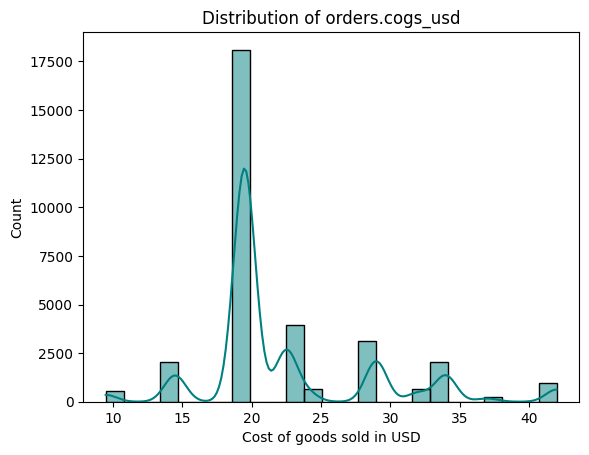

In [167]:
sns.histplot(x=orders['cogs_usd'],
             color='teal',
             kde=True,
             bins=25)
plt.xlabel('Cost of goods sold in USD')
plt.title('Distribution of orders.cogs_usd')
plt.show()

* Variable distribution is positively skewed, similar to the last one.

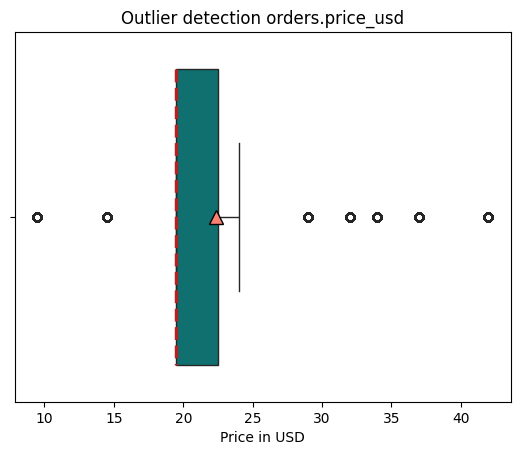

In [168]:
sns.boxplot(x=orders['cogs_usd'],
            color='teal',
            medianprops={'color':'firebrick',
                         'linestyle':'--',
                         'linewidth':'2.5'},
            showmeans=True,
            meanprops={'markerfacecolor':'salmon', 
                       'markeredgecolor':'black',
                       'markersize':'10'})
plt.xlabel('Price in USD')
plt.title('Outlier detection orders.price_usd')
plt.show()

In [169]:
# Identify outliers
aux.quick_outlier_report(orders, 'orders', 'cogs_usd')

=== Mild Outlier Report: orders.cogs_usd ===
All: 9623 (29.78%)
Lower: 2573 (7.96%)
Higher: 7050 (21.82%)


Since this variable also has a positively skewed distribution, it's likely it also has many extreme outliers.

In [170]:
aux.quick_outlier_report(orders, 'orders', 'cogs_usd', mild = False)

=== EXTREME Outlier Report: orders.cogs_usd ===
All: 4442 (13.75%)
Lower: 534 (1.65%)
Higher: 3908 (12.09%)


* Nearly 14% outliers means this is a property of the data which warrants scrutiny and not simply dropping the values.

### Table: `order_items`

### Table: `order_item_refunds`

### Table: `products`

### Table: `website_sessions`

### Table: `website_pageviews`

## Bivariate Analysis

Rather than an exhaustive study, here I analyze what I consider the more salient variable pairs in the data set.

### Study: `orders.price_usd` vs `orders.cogs_usd`

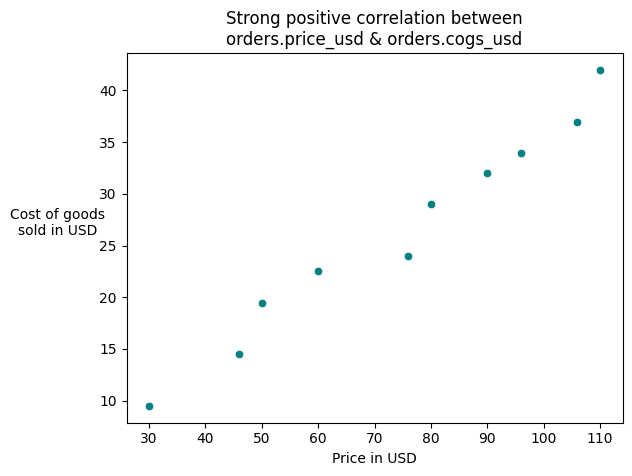

In [171]:
sns.scatterplot(x=orders['price_usd'], 
                y=orders['cogs_usd'],
                color='teal')
plt.xlabel('Price in USD')
plt.ylabel('Cost of goods\nsold in USD', 
           rotation=0,
           labelpad=30)
plt.title('Strong positive correlation between\norders.price_usd & orders.cogs_usd')
plt.show()

## Feature Engineering

### Case: `orders` timestamp splitting

Splitting the timestamp variable into its components will alow us to better analyze seasonality.

In [172]:
# year 2012 2013 2014 2015
orders['year'] =  aux.make_year_ordinal_column(orders, 'created_at')
# month 1 to 12
orders['month'] = aux.make_month_ordinal_column(orders, 'created_at')
# month_name
orders['month_name'] = aux.make_month_name_ordinal_column(orders, 'created_at')
# print
print('Testing ordered categories: \'month\' before 5')
print(orders[orders['month'] < 5]['month'].unique())
print()
print('Testing ordered categories: \'month_name\' before \'May\'')
print(orders[orders['month_name'] < 'May']['month_name'].unique())
print()
print('Testing ordered categories: \'year\' before 2014')
print(orders[orders['year'] < 2014]['year'].unique())

Testing ordered categories: 'month' before 5
[3, 4, 1, 2]
Categories (12, int64): [1 < 2 < 3 < 4 ... 9 < 10 < 11 < 12]

Testing ordered categories: 'month_name' before 'May'
['March', 'April', 'January', 'February']
Categories (12, str): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']

Testing ordered categories: 'year' before 2014
[2012, 2013]
Categories (4, int64): [2012 < 2013 < 2014 < 2015]


### Case: `orders.profit_margin_usd`

Due to the strong correlation between the variables `price_usd` and `cogs_usd` in the `orders` table, a new feature called `profit_margin_usd` will be created. This new feature compounds the other two and also serves to provide information about the profit margin of each order, a feature currently implicit in the data.

In [173]:
orders['profit_margin_usd'] = orders['price_usd'] - orders['cogs_usd']

This new feature has similar characteristics to its components (skewed distribution, high outlier count, etc.).

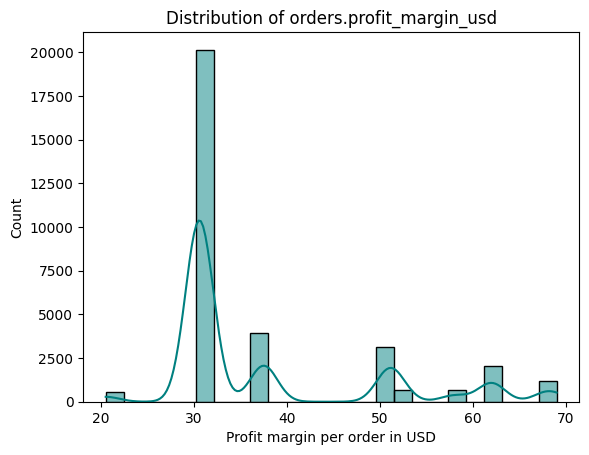

In [174]:
sns.histplot(x=orders['profit_margin_usd'],
             color='teal',
             kde=True,
             bins=25)
plt.xlabel('Profit margin per order in USD')
plt.title('Distribution of orders.profit_margin_usd')
plt.show()

In [175]:
aux.quick_outlier_report(orders, 'orders', 'profit_margin_usd')
print()
aux.quick_outlier_report(orders, 'orders', 'profit_margin_usd', mild = False)

=== Mild Outlier Report: orders.profit_margin_usd ===
All: 7712 (23.87%)
Lower: 0 (0.0%)
Higher: 7712 (23.87%)

=== EXTREME Outlier Report: orders.profit_margin_usd ===
All: 3228 (9.99%)
Lower: 0 (0.0%)
Higher: 3228 (9.99%)


## Key Findings

* Dataset contains sales data from March, 2012 to March, 2015 (3 years).
* (**dashboard material**) Orders contain either one (76%) or two (24%) items.
* The columns `orders.price_usd` & `orders.cogs_usd` are highly correlated, rather than using them together in future analysis it's recommended to use only one of them or the engineered feature `orders.profit_margin_usd.`
* The distribution of the orders monetary variables (price, cost of goods sold, profit margin) is heavily skewed to the right.

# Descriptive Statistics

Here are some descriptive statistics and other noteworthy data for the dashboard.